In [19]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

In [20]:
data=pd.read_csv("IMDB Dataset.csv")
data=data[:10000]
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


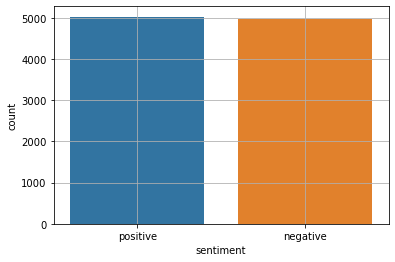

In [3]:
sb.countplot(data['sentiment'])
plt.grid()

In [4]:
ps = PorterStemmer()

In [5]:
def MakeBetterSentences(text):
    #removing stop words, html tags,punctuations
    text=re.sub('<.*?>','',text)
    punctuations = '@#!~?+&*[]-%._-:/£();$=><|{}^' + '''"“´”'`'''
    for p in punctuations:
        text = text.replace(p, f' {p} ')
    words=nltk.word_tokenize(text)
    stop_words=stopwords.words("english")
    eff_words=[]
    for w in words:
        #w=ps.stem(w)
        w=WordNetLemmatizer().lemmatize(w)
        if w not in stop_words:
            eff_words.append(w)
    text=" ".join(eff_words)
    return text

In [6]:
data['review']=data['review'].apply(MakeBetterSentences)

In [7]:
#nltk.download('punkt')

In [8]:
#nltk.download('wordnet')

In [9]:
data

,review,sentiment
0,One reviewer ha mentioned watching 1 Oz episod...,positive
1,A wonderful little production . The filming te...,positive
2,I thought wa wonderful way spend time hot summ...,positive
3,Basically ' family little boy ( Jake ) think '...,negative
4,Petter Mattei ' `` Love Time Money `` visually...,positive
...,...,...
9995,"Fun , entertaining movie WWII German spy ( Jul...",positive
9996,Give break . How anyone say `` good hockey mov...,negative
9997,This movie bad movie . But watching endless se...,negative
9998,This movie wa probably made entertain middle s...,negative


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['review'])
X= pd.DataFrame(vectors.toarray())

In [21]:
X

,0,1,2,3,4,5,6,7,8,9,...,49267,49268,49269,49270,49271,49272,49273,49274,49275,49276
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y=data.iloc[:,-1]

In [12]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 10000, dtype: object

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
mnb.fit(X,y)
mnb.score(X,y)

0.9351